# Working with Data APIs

**Sam Maurer // maurer@berkeley.edu // Oct. 9, 2017**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?

print(type(results))

<class 'str'>


In [3]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1507242230000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.5.8","count":207},"features":[{"type":"Feature","properties":{"mag":2.6,"place":"48km NW of Nikiski, Alaska","time":1507240652953,"updated":1507241752040,"tz":-540,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/ak16989815","detail":"https://earthquake.usgs.gov/earth


In [4]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary (loads = "load string")
data = json.loads(results)

print(type(data))

<class 'dict'>


In [5]:
# print the dictionary

pp.pprint(data)

{'bbox': [-179.9144, -55.2702, 0, 179.9778, 68.4673, 600.28],
 'features': [{'geometry': {'coordinates': [-151.9649, 60.9675, 95.4],
                            'type': 'Point'},
               'id': 'ak16989815',
               'properties': {'alert': None,
                              'cdi': None,
                              'code': '16989815',
                              'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak16989815.geojson',
                              'dmin': None,
                              'felt': None,
                              'gap': None,
                              'ids': ',ak16989815,us2000b1qt,',
                              'mag': 2.6,
                              'magType': 'ml',
                              'mmi': None,
                              'net': 'ak',
                              'nst': None,
                              'place': '48km NW of Nikiski, Alaska',
                              'rms': 0.54,
    

In [6]:
# subsets of the data can be accessed with square brackets, using labels for the 
# named elements and numerals for the lists

# save the list of quakes to a new variable

quakes = data['features']

# print the most recent quake

pp.pprint(quakes[0])

{'geometry': {'coordinates': [-151.9649, 60.9675, 95.4], 'type': 'Point'},
 'id': 'ak16989815',
 'properties': {'alert': None,
                'cdi': None,
                'code': '16989815',
                'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak16989815.geojson',
                'dmin': None,
                'felt': None,
                'gap': None,
                'ids': ',ak16989815,us2000b1qt,',
                'mag': 2.6,
                'magType': 'ml',
                'mmi': None,
                'net': 'ak',
                'nst': None,
                'place': '48km NW of Nikiski, Alaska',
                'rms': 0.54,
                'sig': 104,
                'sources': ',ak,us,',
                'status': 'automatic',
                'time': 1507240652953,
                'title': 'M 2.6 - 48km NW of Nikiski, Alaska',
                'tsunami': 0,
                'type': 'earthquake',
                'types': ',geoserve,origin,phase-data,',


In [7]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 2.6 - 48km NW of Nikiski, Alaska
M 2.6 - 18km SE of Soda Springs, Idaho
M 2.5 - 60km S of Deltana, Alaska
M 2.5 - 33km SW of Noatak, Alaska
M 2.6 - 12km ENE of Ocotillo Wells, CA
M 2.6 - 47km S of Tanaga Volcano, Alaska
M 2.7 - 4km WNW of The Geysers, California
M 5.0 - 4km NW of San Pedro, Philippines
M 4.7 - 39km W of Ramhormoz, Iran
M 2.6 - 42km NW of Big Timber, Montana
M 4.5 - South of the Fiji Islands
M 5.4 - 37km E of Calama, Chile
M 2.5 - 26km WNW of Hayfork, California
M 2.7 - 5km NW of The Geysers, California
M 4.3 - 68km NNW of Kodiak Station, Alaska
M 2.6 - 32km NW of Fairview, Oklahoma
M 2.6 - 41km S of Akutan, Alaska
M 3.4 - 31km NW of Fairview, Oklahoma
M 4.5 - 47km WNW of San Antonio de los Cobres, Argentina
M 3.5 - 31km NW of Fairview, Oklahoma
M 4.2 - 62km SSE of San Francisco del Mar, Mexico
M 3.2 - 151km SSW of Chirikof Island, Alaska
M 4.1 - 138km NE of San Jose del Cabo, Mexico
M 4.8 - Mid-Indian Ridge
M 4.3 - 10km NE of San Jeronimo Ixtepec, Mexico
M 2.7 - 2km 

In [8]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?

print(len(df))

207


In [9]:
# print the first few lines of data

print(df.head())

   depth  magnitude
0  95.40       2.60
1   8.32       2.60
2   0.00       2.50
3   1.20       2.50
4   8.09       2.55


In [10]:
# print some descriptive statistics

print(df.describe())

            depth   magnitude
count  207.000000  207.000000
mean    52.763251    3.736667
std     97.286505    0.984395
min      0.000000    2.460000
25%      8.605000    2.700000
50%     20.660000    4.100000
75%     55.395000    4.600000
max    600.280000    5.700000


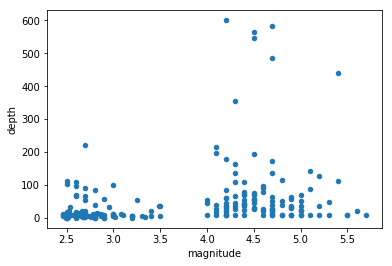

In [11]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [12]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [13]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.head())

   depth  magnitude
0  95.40       2.60
1   8.32       2.60
2   0.00       2.50
3   1.20       2.50
4   8.09       2.55


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has various APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [14]:
import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()

In [15]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'Wurster Hall, Berkeley, CA'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall%2C+Berkeley%2C+CA


In [16]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'results': [{'address_components': [{'long_name': 'Wurster Hall', 'short_name': 'Wurster Hall', 'types': ['premise']}, {'long_name': 'Berkeley', 'short_name': 'Berkeley', 'types': ['locality', 'political']}, {'long_name': 'Alameda County', 'short_name': 'Alameda County', 'types': ['administrative_area_level_2', 'political']}, {'long_name': 'California', 'short_name': 'CA', 'types': ['administrative_area_level_1', 'political']}, {'long_name': 'United States', 'short_name': 'US', 'types': ['country', 'political']}, {'long_name': '94720', 'short_name': '94720', 'types': ['postal_code']}], 'formatted_address': 'Wurster Hall, Berkeley, CA 94720, USA', 'geometry': {'location': {'lat': 37.8705531, 'lng': -122.2547004}, 'location_type': 'ROOFTOP', 'viewport': {'northeast': {'lat': 37.87190208029149, 'lng': -122.2533514197085}, 'southwest': {'lat': 37.86920411970849, 'lng': -122.2560493802915}}}, 'place_id': 'ChIJoZncWiV8hYARg3YPaGTeQv8', 'types': ['establishment', 'point_of_interest', 'univer

In [17]:
# print it more nicely

pp.pprint(data)

{'results': [{'address_components': [{'long_name': 'Wurster Hall',
                                      'short_name': 'Wurster Hall',
                                      'types': ['premise']},
                                     {'long_name': 'Berkeley',
                                      'short_name': 'Berkeley',
                                      'types': ['locality', 'political']},
                                     {'long_name': 'Alameda County',
                                      'short_name': 'Alameda County',
                                      'types': ['administrative_area_level_2',
                                                'political']},
                                     {'long_name': 'California',
                                      'short_name': 'CA',
                                      'types': ['administrative_area_level_1',
                                                'political']},
                                     {'long_name': 'Unit

In [18]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

37.8705531 -122.2547004
37.8705857 -122.2549572


### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

# Part 3: Querying an API with authentication

### Twitter search APIs

Twitter's APIs operate over the web as well, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
http://geduldig.github.io/TwitterAPI/

In [19]:
from TwitterAPI import TwitterAPI

import pprint
pp = pprint.PrettyPrinter()

In [20]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [21]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [22]:
# most recent tweet from CED

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'CEDNews', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

@RichardLHindle, Asst. Professor at the CED, recently published a paper detailing the history of swamplands in CA.… https://t.co/5HlTHRvUFe


In [23]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Oct 04 01:02:10 +0000 2017',
 'entities': {'hashtags': [],
              'symbols': [],
              'urls': [{'display_url': 'twitter.com/i/web/status/9…',
                        'expanded_url': 'https://twitter.com/i/web/status/915381498949271552',
                        'indices': [116, 139],
                        'url': 'https://t.co/5HlTHRvUFe'}],
              'user_mentions': [{'id': 464833436,
                                 'id_str': '464833436',
                                 'indices': [0, 15],
                                 'name': 'Richard L Hindle',
                                 'screen_name': 'RichardLHindle'}]},
 'favorite_count': 1,
 'favorited': False,
 'geo': None,
 'id': 915381498949271552,
 'id_str': '915381498949271552',
 'in_reply_to_screen_name': 'RichardLHindle',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': 464833436,
 'in_reply_to_user_i

### Other API endpoints allow different types of searches

In [24]:
# search for recent tweets with your favorite emoji

endpoint = 'search/tweets'
params = {
    'q': '👻🎃', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

#CDCFEST  #CDCEUVOU DIA 18 DE NOVEMBRO TEM CDC FEST 1 ANO💣
😝🎃👻 https://t.co/yHLzvusbEq

RT @JJyy1261226vV: 何処にいるか分かる？
ヒントはこの子だよっ✨

ハロウィンだから魔法使いのコスプレもしてるんだ🎃👻
トキヤは何を着てもかっこいいよね！！

#トキ音デート https://t.co/Pr6eBcjxpg

My favorite time of year is Octember. 🎄🍁🎃👻

Enjoying the Halloween spirit 🎃👻😱🎃😎 #architecture #Halloween #RealEstate #bungalow #Chicago  #ThursdayThoughts… https://t.co/JkiSxHcSs8

RT @minniexoyou: 🕸🕷まじょ、まじょ、まじょ🌟
可愛すぎた🎃👻 https://t.co/NepytGLzjl



In [25]:
# search for public tweets in Korean

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'ko', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @sal_goo_: 식빵님 이젠 그 틀은 무리인 거 같아요.. https://t.co/WG1qLbCngB

위성대. 내가 데려간다고 했어.

RT @MHtwinkle_KM: 왜냐면 자기를 위한 곡이니까.. https://t.co/MvmJKJZrBV

RT @daehwi_gif_egg: 엠씨보면서 그렇게 귀여우면 세상사람들 대휘 귀여운거 다 알게 되잖나 .. 
https://t.co/nrF75gXIFR
#이대휘 #워너원 https://t.co/Gswo5hLrIV



In [26]:
# search for public tweets geotagged near the UC Berkeley campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '37.873,-122.260,0.5km', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

If I get accepted… should I pursue my PhD here next year after I get my masters degree? #calberkeley #ucb. Photo cr… https://t.co/0NPJircVfH

Intersect Conference @UCBDiversity @UCBerkeley #intersectionality #unlearning #community https://t.co/5v3tmx4ajg

First official swag purchase for recruitment travel this fall ☕️ @ Church Divinity School of the… https://t.co/9CwbcxGQEd

Lmao this was some lit ass shit goin at Cal we don’t even know them #rockstarlifestyle #lit #berkeley #cal https://t.co/5L7VyDG6il

syposium on Free Speech in the Age of Social Media / 53rd anniversary of the birth of Berkeley's FSM w @RBReich!!!… https://t.co/fsQMoiZLQl



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

### Bonus: Streaming live tweets in real time 

In [27]:
# Twitter allows only one or two simultaneous streaming connections for 
# each set of API credentials, so this part may not work during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Thu Oct 05 22:24:43 +0000 2017
Minturn, CO, United States
Omg so stoked, the hero 6 has zoom capabilities!!!! Fucking sike, dumbest shit ever... you’re going to make a whole new model with 1 new ft

Thu Oct 05 22:24:43 +0000 2017
Mogi das Cruzes, Brasil, Brasil
Hoje cheguei em casa com a estranha sensação de que estou na profissão errada

Thu Oct 05 22:24:43 +0000 2017
Head of the Harbor, NY, United States
It is time, young Padawan!! https://t.co/ctTvSnMFgM

Thu Oct 05 22:24:43 +0000 2017
Ashland, NJ, United States
It's ridiculous how many og Philly battle rappers still make music and get no recognition for it, beat

Thu Oct 05 22:24:43 +0000 2017
San Marcos, TX, United States
Perturbed

Thu Oct 05 22:24:43 +0000 2017
Maia, Portugal, Portugal
Assim como Shakira e piqué acabaram. Eu e @kguilherme_ depois de quase 5 anos também rompemos. Abraços galera

Thu Oct 05 22:24:43 +0000 2017
Bogotá, D.C., Colombia, Colombia
@NoticiasRCN #FelizJueves

Thu Oct 05 22:24:43 +0000 2017
Spokane, WA, U

### Exercises for the remainder of class

Choose your favorite:

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. The earthquakes API is actually returning a specific data format called [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON), also used by many other geospatial data feeds. Try saving the raw GeoJSON file and opening it in QGIS or in the [geojson.io](http://geojson.io) web viewer.  
   &nbsp;

2. Using the geocoding example as a starting point, try searching Google's Directions API or Elevation API instead. You can read more about them on the [Google Maps web services](https://developers.google.com/maps/web-services/) page.  
   &nbsp;

3. Try out another API that you're interested in. Can you figure out how to connect to it using Python?  

   With municipal data it's often easiest to just download a data file, but APIs are great for querying big data sets or tracking live updates. Here are some resources.

   - San Francisco:  https://data.sfgov.org/developers  
   - Alameda County:  https://data.acgov.org/developers  
   - UC Berkeley:  https://api-central.berkeley.edu  
   - US Census:  http://www.census.gov/data/developers/data-sets.html  
   - Open Data Network:  https://www.opendatanetwork.com  
   - CivicData:  http://www.civicdata.io/  